In [1]:
from IPython.display import display
from PIL import Image
import math
import random


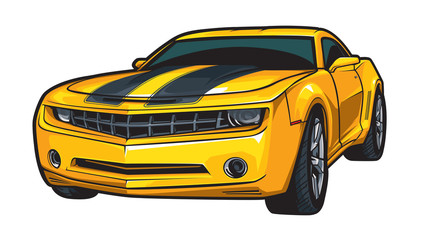

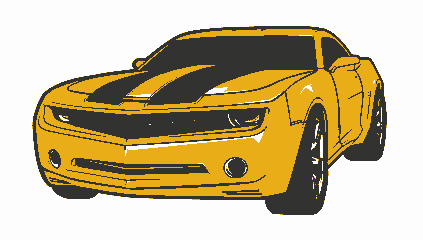

In [2]:
image = Image.open("carA.jpg")

# Display the original image
display(image)

# Convert the image to a list of pixels
pixels = list(image.getdata())

# Define the number of clusters (k)
k = 3

# Initialize k cluster centroids randomly
cluster_centroids = random.sample(pixels, k)

# Define the maximum number of iterations
max_iterations = 100

def Calculate_distance(pixel):
    return [math.sqrt((pixel[0]-centroid[0])**2 + (pixel[1]-centroid[1])**2 + (pixel[2]-centroid[2])**2) for centroid in cluster_centroids]

def calc_dist_new_img(image):
    return [((image.getpixel((i, j))[0]-centroid[0])**2 + (image.getpixel((i, j))[1]-centroid[1])**2 + (image.getpixel((i, j))[2]-centroid[2])**2) for centroid in cluster_centroids]

# K means Clustering
for iteration in range(max_iterations):
    
    clusters = [[] for i in range(k)] # list initialization

     # Assigning each pixel to the closest cluster centroid
    for pixel in pixels: 
        distances = Calculate_distance(pixel)
        nearest_cluster = distances.index(min(distances))
        clusters[nearest_cluster].append(pixel)

    # Calculating new cluster centroids
    for i in range(k):
        if len(clusters[i]) != 0:
            Red = [clust[0] for clust in clusters[i]]
            Green = [clust[1] for clust in clusters[i]]
            Blue = [clust[2] for clust in clusters[i]]
            cluster_centroids[i] = (int(sum(Red) / len(Red)), int(sum(Green) / len(Green)), int(sum(Blue) / len(Blue)))

# Creating the new image
new_image = Image.new('RGB', image.size)
new_image_pixels = new_image.load()
for i in range(image.size[0]):
    for j in range(image.size[1]):
        distances = calc_dist_new_img(image)
        nearest_cluster = distances.index(min(distances))
        new_image_pixels[i, j] = cluster_centroids[nearest_cluster]

# Display the segmented image
display(new_image)
